Name : <b>John George Thattil</b> <br> 
Register Number : <b>23122018</b> <br>
Class : <b>3 MSc DS A</b> <br>

<hr>

#  RANDOM FOREST & DATA VISUALIZATION

<hr>

## 1. DATA EXPLORATION

<hr>


In [531]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import warnings

warnings.filterwarnings("ignore")


df = pd.read_csv("scrap price.csv")
df

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [532]:
# shows the first 5 rows
df.head(5)

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [533]:
#dimension of the DataFrame
df.shape


(205, 26)

In [534]:
# Describe the dataset
df.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [535]:
#Summary of dataframe 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## 2. DATA CLEANING

<hr>

In [536]:
#checking null values
df.isnull().sum()

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [537]:
#checking missing values
missing=df.dropna(inplace = True)
print(missing)

None


In [538]:
#checking duplicate values
dup=df.drop_duplicates(inplace = True)
print(dup)

None


In [539]:
#number of unique values in each column
df.nunique()


ID                  205
symboling             6
name                147
fueltypes             2
aspiration            2
doornumbers           2
carbody               5
drivewheels           3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [540]:
# This code drops the columns "ID", "symboling", and "name" which are not necessary for prediction
df.drop(["ID", "symboling", "name",], axis=1, inplace=True)

df

,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [541]:
# retrieves the column labels 
df.columns

Index(['fueltypes', 'aspiration', 'doornumbers', 'carbody', 'drivewheels',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [542]:
# Find columns with datatype 'object'
df.describe(include='object')

,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205
unique,2,2,2,5,3,2,7,7,8
top,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,185,168,115,96,120,202,148,159,94


## 3. DATA VISUALIZATION

<hr>

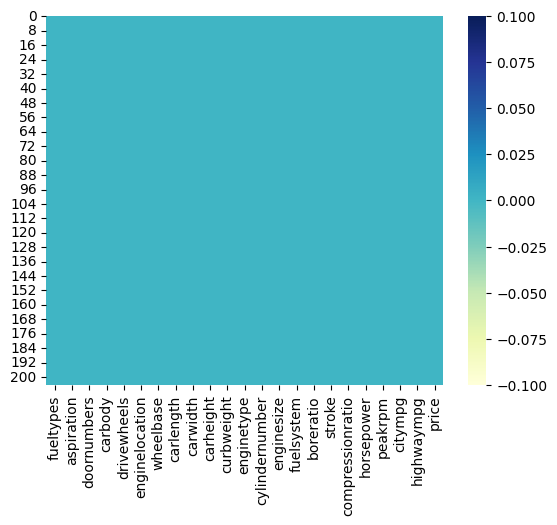

In [543]:

sns.heatmap(df.isnull(), cmap='YlGnBu')
plt.show()

Text(0.5, 1.0, 'Boxplot:price')

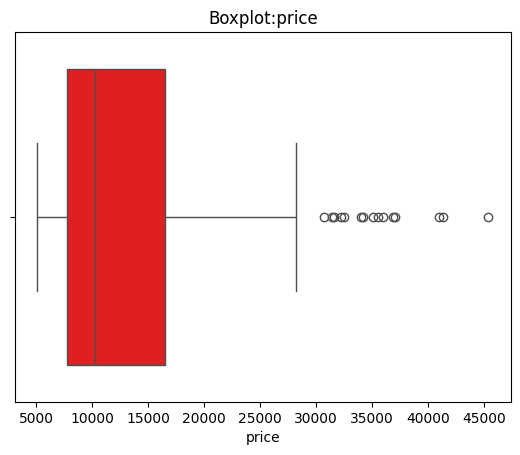

In [544]:
# continuous box plot before removing outliers
sns.boxplot(df.price, color='red', orient ='h')
plt.title('Boxplot:price')

(205, 23)
(190, 23)


<Axes: xlabel='price', ylabel='Density'>

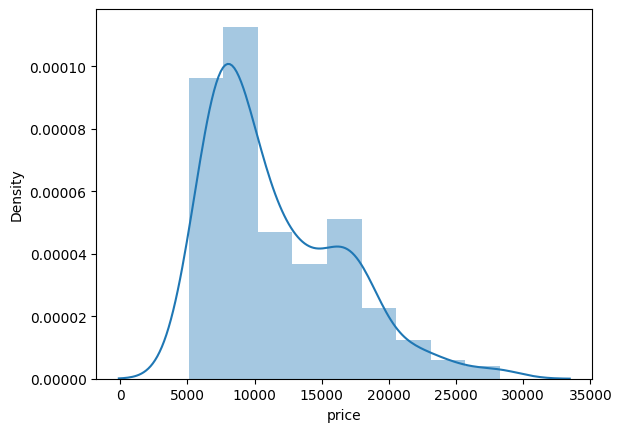

In [545]:
# remove Outlier 
print(df.shape)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['price'] < (Q1 - 1.5 * IQR))|(df['price'] > (Q3 + 1.5*IQR)))]
print(df.shape)
sns.distplot(df['price'])

Text(0.5, 1.0, 'Boxplot:price')

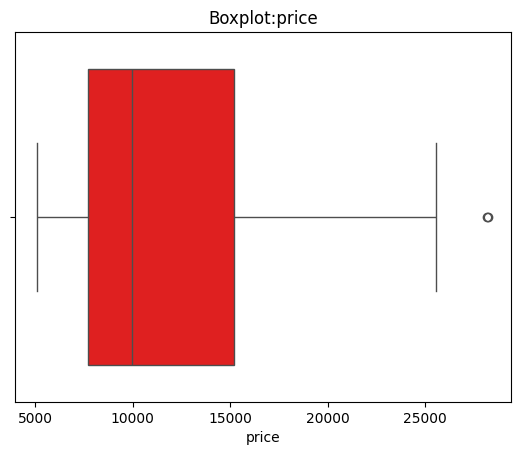

In [546]:
# continuous box plot after removing outliers
sns.boxplot(df.price, color='red', orient ='h')
plt.title('Boxplot:price')

In [547]:
#fueltypes
df.fueltypes.value_counts()

fueltypes
gas       171
diesel     19
Name: count, dtype: int64

Text(0.5, 1.0, 'Barplot of fueltypes')

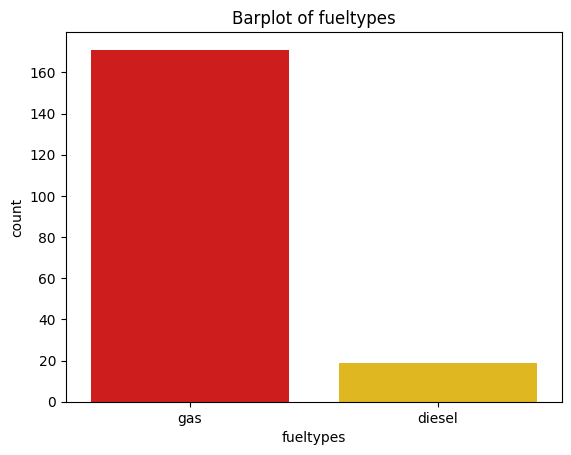

In [548]:
sns.countplot(x='fueltypes', data= df,palette = 'hot')
plt.title('Barplot of fueltypes')

In [549]:
#carbody
df.carbody.value_counts()

carbody
sedan          87
hatchback      69
wagon          25
hardtop         5
convertible     4
Name: count, dtype: int64

<Axes: xlabel='carbody', ylabel='count'>

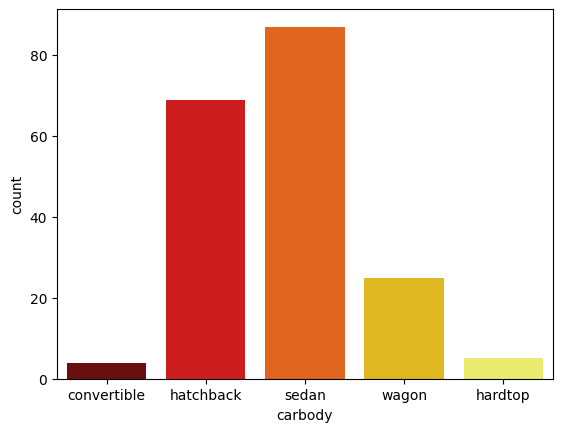

In [550]:

sns.countplot(x='carbody', hue='carbody', data=df, palette='hot', legend=False)


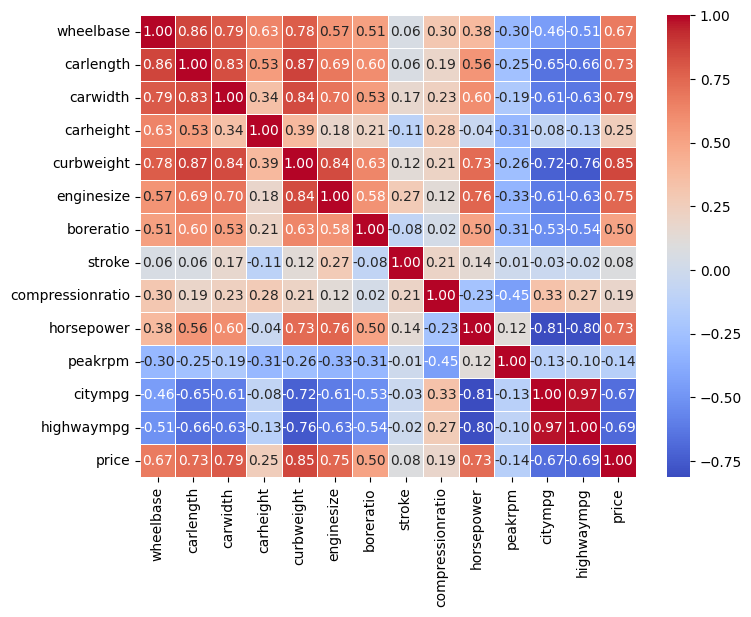

In [551]:
# Generate a heatmap to visualize the correlation matrix
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_df = df[numeric_columns]
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

## 4. DATA PREDICTION USING RANDOM FOREST

<hr>

In [552]:
# # Specify the categorical columns to be converted
# categorical_columns = ['fueltypes',aspiration', 'doornumbers', 'carbody', 'drivewheels', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


for column in df.columns:
    if str(df[column].dtype) == "object":
        for i in range(len(df[column].unique())):
            df[column] = df[column].replace(df[column].unique()[i],i)

df

,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,0,0,0,0,0,88.6,168.8,64.1,48.8,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,0,0,0,0,0,0,88.6,168.8,64.1,48.8,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0,0,0,1,0,0,94.5,171.2,65.5,52.4,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,0,0,1,2,1,0,99.8,176.6,66.2,54.3,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,0,0,1,2,2,0,99.4,176.6,66.4,54.3,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,1,2,0,0,109.1,188.8,68.9,55.5,...,141,0,3.78,3.15,9.5,114,5400,23,28,16845.0
201,0,1,1,2,0,0,109.1,188.8,68.8,55.5,...,141,0,3.78,3.15,8.7,160,5300,19,25,19045.0
202,0,0,1,2,0,0,109.1,188.8,68.9,55.5,...,173,0,3.58,2.87,8.8,134,5500,18,23,21485.0
203,1,1,1,2,0,0,109.1,188.8,68.9,55.5,...,145,6,3.01,3.40,23.0,106,4800,26,27,22470.0


In [553]:
# Split the data into features and target variable
#taking the highest correlation variables to predict the target variable

features =["curbweight","carwidth","enginesize"]

X = df[features] # Features
y = df['price']  # Target variable

In [554]:

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=104)

# # Print shapes to confirm correct splitting
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (152, 3)
X_test shape: (38, 3)
y_train shape: (152,)
y_test shape: (38,)


In [555]:
# Build Random Forest Model
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor() 

In [556]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [557]:
#  Model Evaluation
# Predict on the testing set
y_pred = rf_model.predict(X_test)

<b>Evaluating Train set</b>

In [558]:
# Making predictions on the training set
y_pred_train = rf_model.predict(X_train)

# Evaluating the model performance on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Printing the evaluation metrics for the training set
print("Mean Squared Error on Training Set is ", mse_train)
print("R squared value on Training Set is ", r2_train)

Mean Squared Error on Training Set is  869594.4498449661
R squared value on Training Set is  0.963584303038866


The MSE on the training set is approximately 869,594.45, indicating that the model's predictions on the training data deviate, on average, by this amount squared. 
The R2 value is about 0.96  suggesting that the model explains 96% of the variance in the training data. These metrics collectively indicate that the model fits the training data extremely well, with low prediction errors and a high proportion of variance explained by the model. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


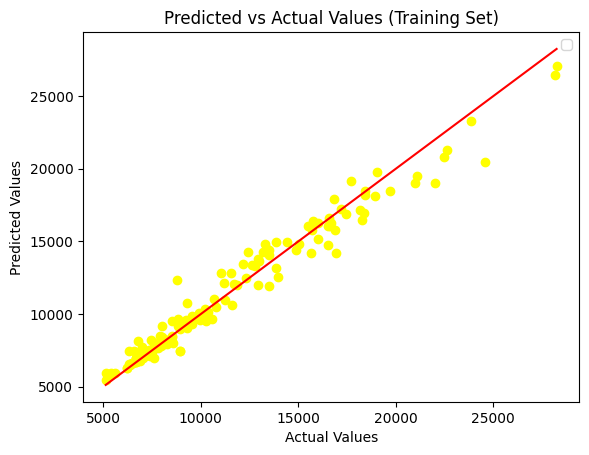

In [559]:
#Visualizing the Train Set Predictions
# Plotting the actual vs predicted values for the training set
plt.scatter(y_train, y_pred_train, color='yellow')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="red")

plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Predicted vs Actual Values (Training Set)')
plt.legend()
plt.show()

<b>Evaluating Test Set</b>

In [560]:
# Calculate Mean Squared Error (MSE) & r2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("R squared value is:",r2)

Mean Squared Error: 3139500.152939549
R squared value is: 0.8832650803214446


The MSE value 3139500.152939549 shows that on average, the model's predictions deviate from the actual values by this amount squared.
The R2 value around 0.88, signifies that roughly 88% of the variance in the dependent variable is explained by the independent variables in the model. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


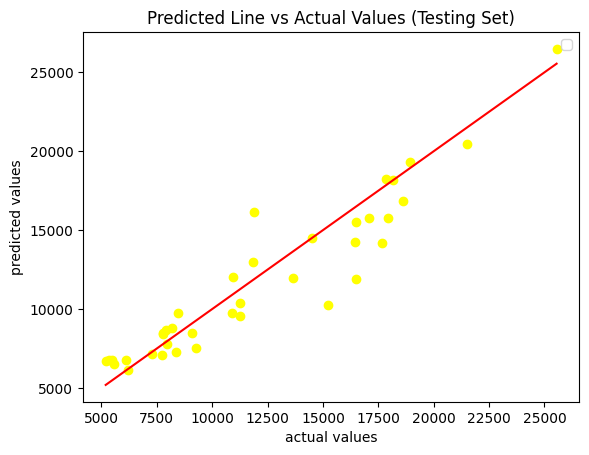

In [561]:
#Visualizing the Test Set Predictions
# Plotting the actual vs predicted values for the test set

plt.scatter(y_test,y_pred,  color='yellow')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color="red")

plt.ylabel('predicted values')
plt.xlabel('actual values')
plt.title('Predicted Line vs Actual Values (Testing Set)')
plt.legend()
plt.show()